In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [4]:
#ЗАГРУЗКА ДАННЫХ
data = pd.read_csv('D:/Работа с данными на Python Сбер/sberbank_data_analysis-master/train.csv') 
data.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Знакомство с датасетом

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(data.isnull().sum())
data.isnull().mean()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
data.describe()  

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.nunique() #Количество уникальных значений

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

### Посмотрим, есть ли очевидная корреляция межу признаками

In [9]:
data.corr()
# Pclass(negatively) кажется более коррелированными с возрастом. Sibsp и Parch также коррелируют меду собой.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

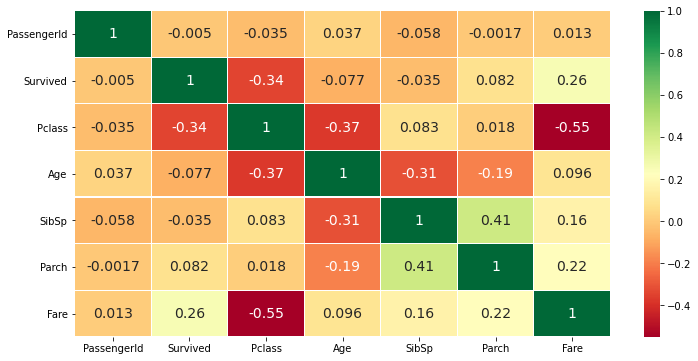

In [10]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':14})

### Смотрим простые взаимосвязи

### Выжившие по полу

In [11]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [12]:
data.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [13]:
pd.crosstab(data["Sex"],data["Survived"])#выжили 74% женщин и 18% мужчин

Survived,0,1
Sex,,
female,81,233
male,468,109


### Выжившие по возрасту

In [14]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


In [15]:
#data['Age'].value_counts()
#data.sort_values((data['Age'].value_counts()), ascending=False)
#data.groupby('Age').count()

In [16]:
#разобьем для удобства на группы по возрасту
data.loc[data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 26), 'Age'] = 1
data.loc[(data['Age'] > 26) & (data['Age'] <= 32), 'Age'] = 2
data.loc[(data['Age'] > 32) & (data['Age'] <= 40), 'Age'] = 3
data.loc[(data['Age'] > 40) & (data['Age'] <= 47), 'Age'] = 4
data.loc[(data['Age'] > 47) & (data['Age'] <= 64), 'Age'] = 5
data.loc[data['Age'] > 64, 'Age'] = 6 
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,30.0000,C148,C


In [17]:
pd.crosstab(data["Age"],data["Survived"])
#выжили в основном дети до 16, средний возраст с 27 до 40 лет и от 48 до 64 лет - группы 0, 2,3,5

Survived,0,1
Age,,
0.0,45,55
1.0,144,75
2.0,74,53
3.0,66,52
4.0,43,18
5.0,42,36
6.0,10,1


### Выжившие по классам

In [18]:
data.Pclass.value_counts()#Распределение по 3 классам

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [19]:
data.groupby("Pclass")["Survived"].mean()#у людей 1 класса было больше шансов выжить

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [20]:
pd.crosstab(data["Pclass"],data["Survived"])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Выжившие по наличию родственников\супругов

In [21]:
data.SibSp.value_counts()#большинство людей были одни или без братьев и сестер, в крайнем случае с 1 

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [22]:
data.groupby("SibSp")["Survived"].mean()# с 1-2 родственниками на борту выживаемость выше

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [23]:
pd.crosstab(data["SibSp"],data["Survived"])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [24]:
pd.crosstab(data["Parch"],data["Survived"])
#Аналогично Sibsp У нас есть максимум шансов выжить при  минимальных значениях Parch (количество родителей или детей)
#Sibsp и Parch можно объединить....

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [25]:
# теперь объединим родственников - те, кто был не один

data['relatives'] = data['SibSp'] + data['Parch'] 
data.loc[data['relatives'] > 0, 'not_alone'] = 0
data.loc[data['relatives'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)
data['not_alone'].value_counts()


1    537
0    354
Name: not_alone, dtype: int64

In [26]:
pd.crosstab(data["relatives"],data["Survived"])#выжили в основном c 1-2-3 родственниками

Survived,0,1
relatives,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


### Выжившие по порту посадки

In [27]:
data.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
pd.crosstab(data["Embarked"],data["Survived"])
#Значения для «Embarked» в порту С кажутся лучше. Добавим корреляцию с Pclass

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [29]:
pd.crosstab(data["Embarked"],data["Pclass"])
#Как мы видим, большинство севших в С были в 1-м классе.

Pclass,1,2,3
Embarked,,,
C,85,17,66
Q,2,3,72
S,127,164,353


In [30]:
data.groupby("Embarked")["Survived"].mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

### Дополнительные столбцы / обработанные данные

In [31]:
#Предположим, что пассажиры с длинными именами - представители элиты, титулованные, возможно, среди них больше выживших
#добавим столбец с длиной имени
data['N_len'] = data['Name'].apply(len)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,NaN,S,1,0,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1,0,51
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1,0,44
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,NaN,S,0,1,21
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,B42,S,0,1,28
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0,40
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,30.0000,C148,C,0,1,21


In [32]:
data.sort_values("N_len").tail(10)
#this is an aspect to consider i think... but is correlated to gender and Fare as well

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,2.0,1,0,345763,18.0000,NaN,S,1,0,55
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,3.0,0,0,110152,86.5000,B77,S,0,1,56
319,320,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",female,3.0,1,1,16966,134.5000,E34,C,2,0,56
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,2.0,1,0,11668,21.0000,NaN,S,1,0,56
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,3.0,1,5,347077,31.3875,NaN,S,6,0,57
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,3.0,1,5,347082,31.2750,NaN,S,6,0,57
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,3.0,1,1,29750,39.0000,NaN,S,2,0,61
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,5.0,1,0,11755,39.6000,A16,C,1,0,65
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,1.0,0,0,250655,26.0000,NaN,S,0,1,67
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,1.0,1,0,PC 17758,108.9000,C65,C,1,0,82


In [33]:
data.groupby("N_len")["Survived"].mean().tail(20)   #большая часть  с длинными именами выживает (len>42)

N_len
42    0.200000
43    0.800000
44    1.000000
45    0.777778
46    0.571429
47    0.727273
48    1.000000
49    1.000000
50    1.000000
51    1.000000
52    0.750000
53    1.000000
54    0.000000
55    0.500000
56    0.666667
57    0.500000
61    1.000000
65    1.000000
67    1.000000
82    1.000000
Name: Survived, dtype: float64

In [34]:
data.sort_values(['Survived','N_len'], ascending=[False, False]).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,1.0,1,0,PC 17758,108.9000,C65,C,1,0,82
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,1.0,0,0,250655,26.0000,NaN,S,0,1,67
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,5.0,1,0,11755,39.6000,A16,C,1,0,65
670,671,1,2,"Brown, Mrs. Thomas William Solomon (Elizabeth ...",female,3.0,1,1,29750,39.0000,NaN,S,2,0,61
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,3.0,1,5,347077,31.3875,NaN,S,6,0,57


In [35]:
#влияет ли название каюты, может, обозначение кают буквами относится к определенным палубам или 
#глубине расположения на корабле
data.Cabin=data.Cabin.fillna("None")#заполним прропуски для анализа
data.Cabin

0      None
1       C85
2      None
3      C123
4      None
       ... 
886    None
887     B42
888    None
889    C148
890    None
Name: Cabin, Length: 891, dtype: object

In [36]:
#отделим букву из названия каюты
def letter (string):
    first=string[0]
    return first

In [37]:
data["letter"]=data["Cabin"].apply(letter)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len,letter
0,1,0,3,"Braund, Mr. Owen Harris",male,1.0,1,0,A/5 21171,7.2500,None,S,1,0,23,N
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1,0,51,C
2,3,1,3,"Heikkinen, Miss. Laina",female,1.0,0,0,STON/O2. 3101282,7.9250,None,S,0,1,22,N
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1,0,44,C
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,None,S,0,1,24,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,2.0,0,0,211536,13.0000,None,S,0,1,21,N
887,888,1,1,"Graham, Miss. Margaret Edith",female,1.0,0,0,112053,30.0000,B42,S,0,1,28,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,None,S,3,0,40,N
889,890,1,1,"Behr, Mr. Karl Howell",male,1.0,0,0,111369,30.0000,C148,C,0,1,21,C


In [38]:
pd.crosstab(data["letter"],data["Survived"])
#Из кают В,С,D,Е выживали гораздо чаще

Survived,0,1
letter,,
A,8,7
B,12,35
C,24,35
D,8,25
E,8,24
F,5,8
G,2,2
N,481,206
T,1,0


In [39]:
data.groupby("letter")["Survived"].mean()

letter
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
N    0.299854
T    0.000000
Name: Survived, dtype: float64

Итак, у нас есть ряд факторов, повышающих шансы на выживание:   
    1. пол - женский   
    2.возраст - 0,2,3,5   
    3.класс - 1   
    4. не одинокие - 1-2-3 родственника   
    5.порт - С   
    6.длина имени  - больше 42   
    7.буква каюты - B,C,D,E   
    
Построим гипотезы на комбинации этих факторов
    

### Гипотеза 1. Выжили большинство женщин, севших в порту С, занимавших каюты B,C,D,E



In [40]:
df1 = data[(data['Embarked'] == 'C') & (data['Sex'] == 'female') & (data['letter'].isin(['B','C','D','E']))] 
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len,letter
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1,0,51,C
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,1,0,46,B
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,5.0,1,0,PC 17572,76.7292,D33,C,1,0,40,D
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,5.0,0,0,PC 17595,28.7125,C49,C,0,1,26,C
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,4.0,0,0,PC 17610,27.7208,B4,C,0,1,41,B


In [41]:
df1["Survived"].mean()#гипотеза подтверждается

0.9714285714285714

### Гипотеза 2. Выжили большинство пассажиров первого класса, имеющих длинные имена, путешествующие не в одиночку

In [272]:
df2 = data[(data['Pclass'] == 1) & (data['N_len'] > 42) & (data['not_alone'].isin([1,2,3]))] 
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len,letter
187,188,1,1,"Romaine, Mr. Charles Hallace (""Mr C Rolmane"")",male,4.0,0,0,111428,26.5500,None,S,0,1,45,N
507,508,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,None,S,0,1,45,N
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,1.0,0,0,PC 17482,49.5042,C90,C,0,1,48,C
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,3.0,0,0,110152,86.5000,B77,S,0,1,56,B
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,5.0,0,0,17466,25.9292,D17,S,0,1,51,D


In [42]:
df2["Survived"].mean()  #гипотеза верна на 100%

NameError: name 'df2' is not defined

### Гипотеза 3. Выжили большинство пассажиров возраста 0,2,3,5, севших в порту С, путешествующих 1 классом

In [46]:
df3 = data[(data['Pclass'] == 1) & (data['Embarked'] == 'C') & (data['Age'].isin([0,2,3,5]))] 
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len,letter
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1,0,51,C
30,31,0,1,"Uruchurtu, Don. Manuel E",male,3.0,0,0,PC 17601,27.7208,None,C,0,1,24,N
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,2.0,1,0,PC 17604,82.1708,None,C,1,0,23,N
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,5.0,1,0,PC 17572,76.7292,D33,C,1,0,40,D
155,156,0,1,"Williams, Mr. Charles Duane",male,5.0,0,1,PC 17597,61.3792,None,C,1,0,27,N


In [47]:
df3["Survived"].mean()#здесь вероятность высокая, но не 100%

0.717391304347826

### Гипотеза 4. Выжили большинство женщин возраста 0,2,3,5, путешествующих 1 классом, занимающих каюты B,C,D,E

In [48]:
df4 = data[(data['Pclass'] == 1) & (data['Sex'] == 'female') & (data['letter'].isin(['B','C','D','E']) & (data['Age'].isin([0,2,3,5])))] 
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len,letter
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1,0,51,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1,0,44,C
11,12,1,1,"Bonnell, Miss. Elizabeth",female,5.0,0,0,113783,26.5500,C103,S,0,1,24,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,5.0,1,0,PC 17572,76.7292,D33,C,1,0,40,D
61,62,1,1,"Icard, Miss. Amelie",female,3.0,0,0,113572,80.0000,B28,NaN,0,1,19,B


In [49]:
df4["Survived"].mean()#гипотеза подтверждается

0.9591836734693877

### Гипотеза 5. Выжили большинство пассажиров возраста 0,2,3,5, севших в порту С, занимающих каюты B,C,D,E

In [50]:
df5 = data[(data['Embarked'] == 'C') & (data['Age'].isin([0,2,3,5]) & (data['letter'].isin(['B','C','D','E'])))] 
df5.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,N_len,letter
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1,0,51,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,5.0,1,0,PC 17572,76.7292,D33,C,1,0,40,D
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,5.0,0,0,PC 17595,28.7125,C49,C,0,1,26,C
195,196,1,1,"Lurette, Miss. Elise",female,5.0,0,0,PC 17569,146.5208,B80,C,0,1,20,B
215,216,1,1,"Newell, Miss. Madeleine",female,2.0,1,0,35273,113.2750,D36,C,1,0,23,D


In [51]:
df5["Survived"].mean()#тенденция есть, но не 100%

0.7272727272727273

### Гипотеза 6. Выжили большинство детей возраста 0 (до 16 лет), путешествующих 1 классом (богатых)

In [52]:
df6 = data.groupby(["PassengerId"]).filter(lambda x: x['Age'] == 0)

In [55]:
df7 = df6.groupby(['Sex', "Pclass"])['Survived'].agg(['sum','size'])
df7

sum  size
Sex    Pclass           
female 1         5     6
       2        10    10
       3        18    33
male   1         3     3
       2         9    11
       3        10    37

In [ ]:
# выжили не только почти все дети 1 класса, но и второго класса тоже